In [1]:

import sys
sys.path.append('../codes')

In [2]:
import torch
import numpy as np
import pandas as pd
from torch  import nn
from sklearn.preprocessing import OneHotEncoder

In [3]:
%load_ext autoreload
%autoreload 2
import networks
import utils
import config
import loss
import trainer
import pickle
import evaluator
from sklearn.preprocessing import MinMaxScaler

In [4]:
tr_loader = utils.create_dataloader_for_rep_learned_data(config.training_representation, config.training_data)

In [5]:
validation_loader = utils.create_dataloader_for_rep_learned_data(config.val_representation, config.validation_data, 
                                                        is_training=False)

In [6]:
# utils.dump_pickle(tr_loader.dataset.weather_scaler, config.weather_scaler_path)
# utils.dump_pickle(tr_loader.dataset.target_scaler, config.target_scaler_path)

In [7]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:1


In [8]:
num_geno = tr_loader.dataset.data.shape[1]
model = networks.final_net(num_features = tr_loader.dataset.data.shape[1], hidden_dim=233)

In [9]:
criterion = nn.MSELoss()

In [10]:
output = trainer.train_model_by_avg(model, tr_loader, validation_loader, criterion, config.final_model_path)

Model is traning on:  cuda
Current epoch: 0 Best epoch 0
Training Loss: 27.447801135716993, training PCC: 0.08332660964948184
Validation Loss: 26.621499813466833, validation PCC: 0.49748150873323194

Current epoch: 1 Best epoch 0
Training Loss: 27.244707087686074, training PCC: 0.09374255400592539
Validation Loss: 26.408546491982282, validation PCC: 0.4792488654371815

Current epoch: 2 Best epoch 0
Training Loss: 26.998186702221897, training PCC: 0.1287774302355033
Validation Loss: 26.1258851783863, validation PCC: 0.46982859861971504

Current epoch: 3 Best epoch 0
Training Loss: 26.639107080625408, training PCC: 0.18185481604652048
Validation Loss: 25.684797477722167, validation PCC: 0.46441147853107334

Current epoch: 4 Best epoch 0
Training Loss: 26.051382823390057, training PCC: 0.23092465031608472
Validation Loss: 24.951727402728537, validation PCC: 0.46091189030271773

Current epoch: 5 Best epoch 0
Training Loss: 25.10034597646067, training PCC: 0.2707349936911778
Validation Loss

KeyboardInterrupt: 

In [ ]:
tr_loss, val_loss, tr_pccs, val_pccs = output

df = pd.DataFrame({
    'epochs': list(range(len(tr_loss))) * 2,
    'loss': list(tr_loss) + list(val_loss),
    'type': ['training'] * len(tr_loss) + ['validation'] * len(val_loss),
    'pcc': np.array(tr_pccs + val_pccs)
})

df.to_pickle('../outputs/representation_learned_training_outputs_' + config.version + '.pkl')

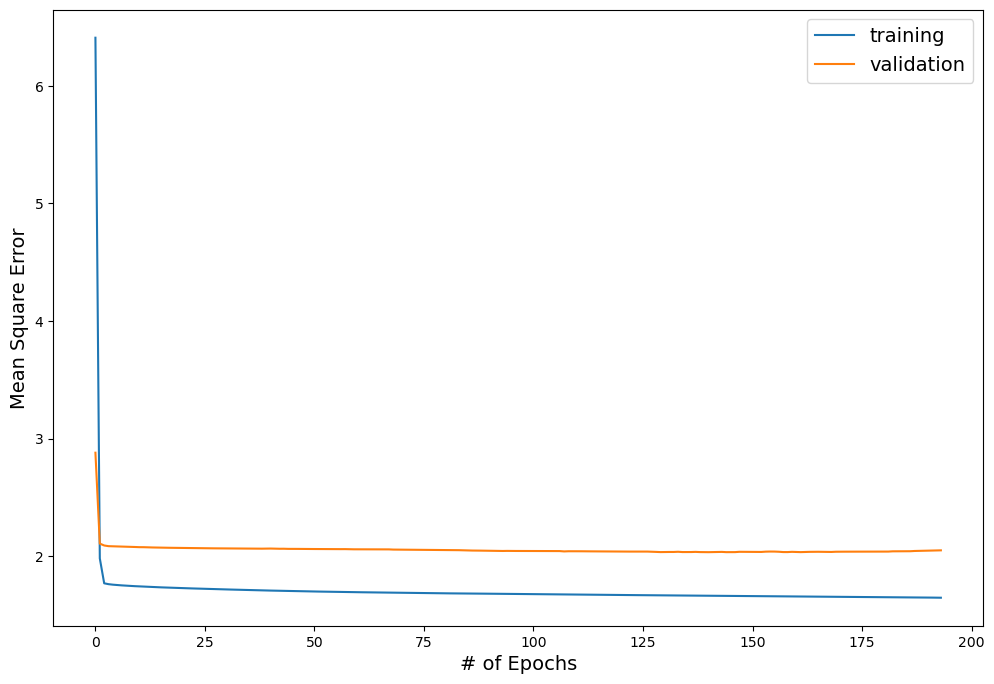

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df, x="epochs", y="loss", hue="type")
ax.set_xlabel("# of Epochs", fontsize = 14)
ax.set_ylabel("Mean Square Error", fontsize = 14)
ax.legend(fontsize=14)
fig = ax.get_figure()
fig.savefig('../figures/loss_representation_learned_' + config.version + '.jpeg', dpi=256 )


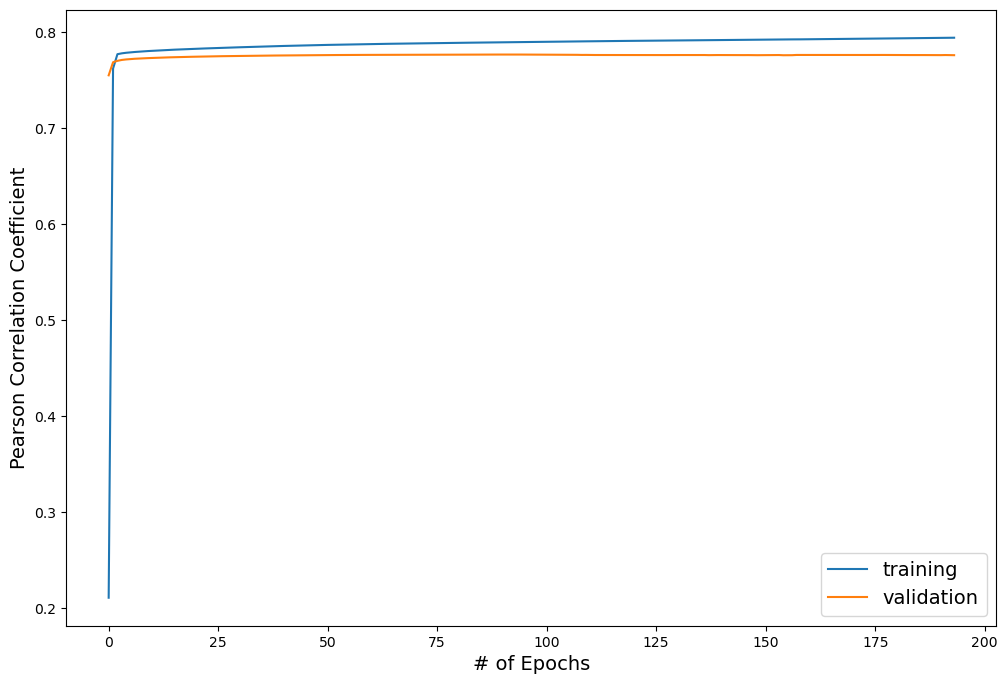

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df, x="epochs", y="pcc", hue="type")
fig = ax.get_figure()
ax.set_xlabel("# of Epochs", fontsize = 14)
ax.set_ylabel("Pearson Correlation Coefficient", fontsize = 14)
ax.legend(fontsize=14)
fig.savefig('../figures/pcc_representation_learned_' + config.version + '.jpeg', dpi=256)